# (sFigure15)-Driver Regulators of Cell Fate Analysis of Exhausted T Cells.

In [1]:
import omicverse as ov
import scanpy as sc
import pandas as pd
import numpy as np


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.9, Tutorials: https://omicverse.readthedocs.io/


In [2]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [3]:
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
adata_CD8.uns['Subcelltype_colors'] = ov.pl.green_color[0:4] + ov.pl.red_color[0:4] +  ov.pl.blue_color[0:4]
adata_CD8,adata_CD4

(AnnData object with n_obs × n_vars = 6184 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 6816 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga

In [4]:
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'C6.CD8.FOS+IL7R+.T-early_response',
    'CD8.FOS+JUN+.T-early_response':'C5.CD8.FOS+JUN+.T-early_response',
    'CD8.GZMK+.Tem':'C3.CD8.GZMK+.Tem',
    'CD8.GZMK+.Tn':'C1.CD8.GZMK+.Tn',
    'CD8.GZMK+.early_Tem':'C2.CD8.GZMK+.early_Tem',
    'CD8.ISG+.T':'C7.CD8.ISG+.T',
    'CD8.KLRD1+TYROBP+.NK-like':'C11.CD8.KLRD1+TYROBP+.NK-like',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'C9.CD8.ZNF683+CXCR6+.Trm',
    'CD8.ZNF683+CXCR6-.Trm':'C10.CD8.ZNF683+CXCR6-.Trm',
    'CD8.ZNF683-CXCR6+.Trm':'C12.CD8.ZNF683-CXCR6+.Trm',
}
adata_CD8.obs['Subcelltype_ID_type']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

type_color_rna={
    'CD4.CAPG+.Tm':'C3.CD4.CAPG+.Tm',
    'CD4.CAPG+CREM-.Tm':'C4.CD4.CAPG+CREM-.Tm',
    'CD4.ADSL+.Tn':'C6.CD4.ADSL+.Tn',
    'CD4.IL21+.Tfh':'C7.CD4.IL21+.Tfh',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'C2.CD4.TNF+.T',
    'CD4.TNFRSF9+.Treg':'C11.CD4.TNFRSF9+.Treg',
    'CD4.TOX2+.Tfh':'C8.CD4.TOX2+.Tfh',
    'CD4.Tn':'C1.CD4.Tn',
    'CD4.TMP1+.Tm':'C5.CD4.TMP1+.Tm',
}
adata_CD4.obs['Subcelltype_ID_type']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD4

AnnData object with n_obs × n_vars = 6816 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [5]:
MAIT = adata_CD8[adata_CD8.obs['Subcelltype']=='CD8.MAIT']
MAIT

View of AnnData object with n_obs × n_vars = 563 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
prior_network=ov.read('scRNA-seq/Packages/CEFCON/prior_data/network_human.csv')
prior_network

,from,to,edge_type
0,KLF2,DLGAP1,directed
1,KLF2,DTNB,directed
2,KLF2,BHLHE40,directed
3,KLF2,RPS6KA1,directed
4,KLF2,PXN,directed
...,...,...,...
5583018,ZSCAN32,ZSCAN23,undirected
5583019,ZSCAN9,ZSCAN23,undirected
5583020,ZSCAN32,ZSCAN29,undirected
5583021,ZSCAN32,ZSCAN30,undirected


In [7]:
help(ov.single.pyCEFCON)

Help on class pyCEFCON in module omicverse.single._cefcon:

class pyCEFCON(builtins.object)
 |  pyCEFCON(input_expData, input_priorNet, input_genesDE=None, additional_edges_pct=0.01, cuda=0, seed=2023, hidden_dim=128, output_dim=64, heads=4, attention='COS', miu=0.5, epochs=350, repeats=5, edge_threshold_param=8, remove_self_loops=False, topK_drivers=100, solver='GUROBI')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_expData, input_priorNet, input_genesDE=None, additional_edges_pct=0.01, cuda=0, seed=2023, hidden_dim=128, output_dim=64, heads=4, attention='COS', miu=0.5, epochs=350, repeats=5, edge_threshold_param=8, remove_self_loops=False, topK_drivers=100, solver='GUROBI')
 |      Args:
 |      input_expData (str or sc.AnnData or pd.DataFrame): input gene expression data. It can be the path to a csv file, an AnnData object, or a pandas dataframe.
 |                                                     If the input is an AnnData object, the lineage name must be containe

In [8]:
adata_CD4_part = adata_CD4[adata_CD4.obs['Subcelltype'].isin(['CD4.IL26+.Th17','CD4.LAG3+.Treg'])]
adata_CD8_part = adata_CD8[adata_CD8.obs['Subcelltype'].isin(['CD8.MAIT','CD8.CXCL13+.Termianl_Tex'])]
import anndata as ad
adata = ad.concat([adata_CD4_part,adata_CD8_part])
adata = adata.raw.to_adata()
adata

AnnData object with n_obs × n_vars = 1379 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    obsm: 'X_pca', 'X_scVI', 'X_umap'

In [9]:
#adata = adata.raw.to_adata()
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=5000,)
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]
adata

Begin robust gene identification
After filtration, 19543/32559 genes are kept. Among 19543 genes, 19543 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


View of AnnData object with n_obs × n_vars = 1379 × 5000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    var: 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'

In [10]:
adata.uns['lineages'] = set(adata.obs['Subcelltype'])
for celltype in set(adata.obs['Subcelltype']):
    adata.obs.loc[:,celltype] = 1
adata

AnnData object with n_obs × n_vars = 1379 × 5000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'CD8.MAIT', 'CD4.LAG3+.Treg', 'CD4.IL26+.Th17', 'CD8.CXCL13+.Termianl_Tex'
    var: 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'log1p', 'hvg', 'lineages'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'

Storing dendrogram info using `.uns['dendrogram_Subcelltype']`
ranking genes
    finished: added to `.uns['Subcelltype_ID_type_wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


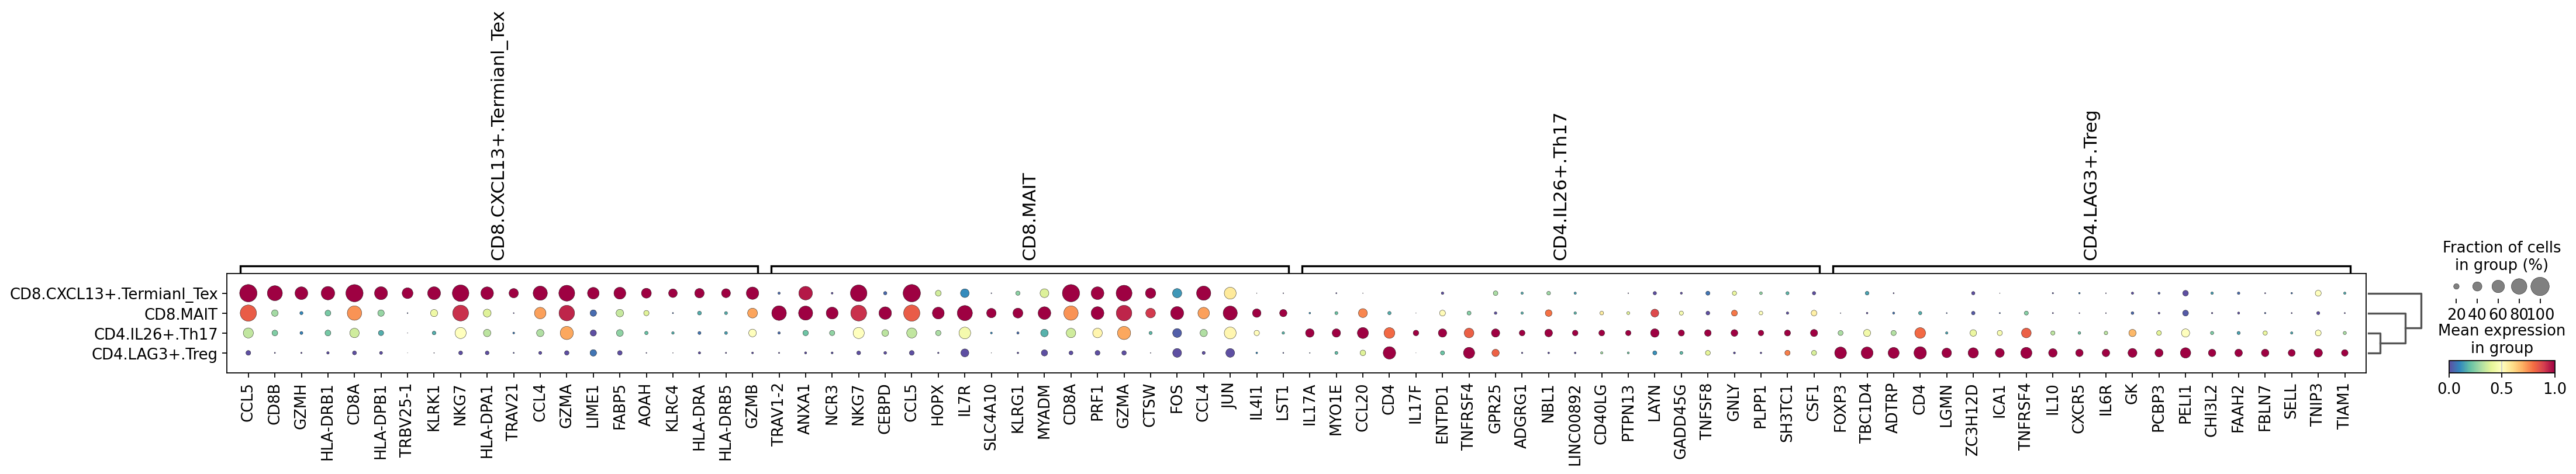

In [11]:
sc.tl.dendrogram(adata,'Subcelltype',use_rep='X_scVI')
sc.tl.rank_genes_groups(adata, 'Subcelltype', use_rep='X_scVI',
                        method='wilcoxon',use_raw=False,key_added='Subcelltype_ID_type_wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata,groupby='Subcelltype',  
                                cmap='Spectral_r',key='Subcelltype_ID_type_wilcoxon',
                                standard_scale='var',n_genes=20)


In [12]:
for celltype in adata.uns['lineages']:
    significant = adata.uns['Subcelltype_ID_type_wilcoxon']['pvals'][celltype]<0.1
    adata.var.loc[:,celltype+'_logFC']=0.1
    adata.var.loc[adata.uns['Subcelltype_ID_type_wilcoxon']['names'][celltype][significant].tolist(),celltype+'_logFC'] = abs(adata.uns['Subcelltype_ID_type_wilcoxon']['logfoldchanges'][celltype][significant]).tolist()
    print(adata.uns['Subcelltype_ID_type_wilcoxon']['names'][celltype][significant].tolist())

['TRAV1-2', 'ANXA1', 'NCR3', 'NKG7', 'CEBPD', 'CCL5', 'HOPX', 'IL7R', 'SLC4A10', 'KLRG1', 'MYADM', 'CD8A', 'PRF1', 'GZMA', 'CTSW', 'FOS', 'CCL4', 'JUN', 'IL4I1', 'LST1', 'RGCC', 'TRGC2', 'HPGD', 'DPP4', 'MYBL1', 'FOSB', 'TLE1', 'TYROBP', 'CCL4L2', 'SORL1', 'LMNA', 'MATK', 'AUTS2', 'THBS1', 'MT2A', 'CAPG', 'S1PR5', 'NR4A1', 'GZMB', 'GZMK', 'TRBV6-1', 'CA2', 'ATF3', 'CD83', 'IKZF2', 'CCL3L1', 'ITM2C', 'SLAMF7', 'PLCB1', 'TRBV6-4', 'AC020916.1', 'TRGV2', 'CCL3', 'SPRY1', 'KLF2', 'TNF', 'TRGV4', 'KLRK1', 'GPR35', 'NFKBID', 'FEZ1', 'TRGV8', 'HDAC9', 'AREG', 'KIF5C', 'ID3', 'MUC5AC', 'CXXC5', 'SCART1', 'NCOA7', 'TRGV3', 'PLEK', 'MYC', 'TRBV20-1', 'AC243829.4', 'COLQ', 'TNFSF9', 'TNFRSF13C', 'SESN1', 'MAFF', 'LAYN', 'ME1', 'BCL2A1', 'KIT', 'ARHGAP26', 'TBX21', 'TUBB2A', 'MVB12B', 'CYSTM1', 'TRGV9', 'CCL20', 'TNFSF14', 'TNFSF13B', 'CRYBG1', 'KRT86', 'IRF4', 'ADRB2', 'SYNGR1', 'CAMK2N1', 'ZBTB43', 'NBL1', 'C12orf75', 'FLNB', 'CD9', 'IQCG', 'GFPT2', 'EGR1', 'TNFRSF9', 'GKN1', 'DKK3', 'RIN3', 'GR

In [13]:
CEFCON_obj = ov.single.pyCEFCON(adata, prior_network, repeats=5,solver='SCIP')
CEFCON_obj.preprocess()
CEFCON_obj.train()
# Idenytify driver regulators for each lineage
CEFCON_obj.predicted_driver_regulators()

Start data preparation

[0] - Data loading and preprocessing...
Consider the input data with 4 lineages:
  Lineage - CD8.MAIT:
    339 extra edges (Spearman correlation > 0.6) are added into the prior gene interaction network.
    Total number of edges: 182097.
    n_genes × n_cells = 3811 × 1379
  Lineage - CD4.LAG3+.Treg:
    0 extra edges (Spearman correlation > 0.6) are added into the prior gene interaction network.
    Total number of edges: 182097.
    n_genes × n_cells = 3811 × 1379
  Lineage - CD4.IL26+.Th17:
    0 extra edges (Spearman correlation > 0.6) are added into the prior gene interaction network.
    Total number of edges: 182097.
    n_genes × n_cells = 3811 × 1379
  Lineage - CD8.CXCL13+.Termianl_Tex:
    0 extra edges (Spearman correlation > 0.6) are added into the prior gene interaction network.
    Total number of edges: 182097.
    n_genes × n_cells = 3811 × 1379
Start model training

[1] - Constructing cell-lineage-specific GRN...
  Lineage - CD8.MAIT: 


  Iter: 5/5: 100%|██████████████| 350/350 [01:07<00:00,  5.22it/s, loss=0.000486, min_loss=0.000134]


[1] - Constructing cell-lineage-specific GRN...
  Lineage - CD4.LAG3+.Treg: 


  Iter: 1/5:  84%|███████████████████████████▊     | 295/350 [00:56<00:10,  5.22it/s, loss=0.000301]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

  Iter: 5/5: 100%|██████████████| 350/350 [01:06<00:00,  5.22it/s, loss=0.000575, min_loss=0.000173]


Finish model training

Start predict lineage - CD8.MAIT:
Start calculate gene influence score - CD8.MAIT:
Start calculate gene driver regulators - CD8.MAIT:
[2] - Identifying driver regulators...
  Solving MFVS problem...
    137 critical nodes are found.
    0 nodes left after graph reduction operation.
  137 MFVS driver genes are found.
  Solving MDS problem...
    9 critical nodes are found.
    1267 nodes left after graph reduction operation.
    Solving the Integer Linear Programming problem on the reduced graph...
      Inaccurate solver is selected! Now, solving by SCIP...(optimal value with SCIP:119.0,  status:optimal)
  128 MDS driver genes are found.
Start predict lineage - CD4.LAG3+.Treg:
Start calculate gene influence score - CD4.LAG3+.Treg:
Start calculate gene driver regulators - CD4.LAG3+.Treg:
[2] - Identifying driver regulators...
  Solving MFVS problem...
    148 critical nodes are found.
    0 nodes left after graph reduction operation.
  148 MFVS driver genes are fo

In [14]:
CEFCON_obj.predicted_RGM()


Start calculate regulon-like gene modules - CD8.MAIT:
[3] - Identifying regulon-like gene modules...
Done!
Start calculate regulon-like gene modules - CD4.LAG3+.Treg:
[3] - Identifying regulon-like gene modules...
Done!
Start calculate regulon-like gene modules - CD4.IL26+.Th17:
[3] - Identifying regulon-like gene modules...
Done!
Start calculate regulon-like gene modules - CD8.CXCL13+.Termianl_Tex:
[3] - Identifying regulon-like gene modules...
Done!
Finish predicted



In [15]:
CEFCON_obj.cefcon_results_dict['CD8.MAIT'].driver_regulator.head()

,influence_score,is_driver_regulator,is_MFVS_driver,is_MDS_driver,is_TF
MYC,8.278567,True,True,True,True
FOS,7.786938,True,True,True,True
JUN,7.762075,True,True,True,True
CEBPD,7.459220,True,True,True,True
FOXP3,7.238721,True,True,True,True


In [16]:
Key_regulators = CEFCON_obj.cefcon_results_dict['CD8.MAIT'].driver_regulator.index.tolist()
set(Key_regulators)&set(['RBPJ','BATF','NR5A2','TOX','IKZF4','ARID5B''ZBED2','PRDM1','ETV1','TOX2','STAT3','SOX4','VDR','IFI16','FOXP3'])

{'FOXP3'}

In [17]:
set(adata_CD8.obs['Subcelltype'])

{'CD8.CXCL13+.Termianl_Tex',
 'CD8.FOS+IL7R+.T-early_response',
 'CD8.FOS+JUN+.T-early_response',
 'CD8.GZMK+.Tem',
 'CD8.GZMK+.Tn',
 'CD8.GZMK+.early_Tem',
 'CD8.ISG+.T',
 'CD8.KLRD1+TYROBP+.NK-like',
 'CD8.MAIT',
 'CD8.ZNF683+CXCR6+.Trm',
 'CD8.ZNF683+CXCR6-.Trm',
 'CD8.ZNF683-CXCR6+.Trm'}

In [18]:
adata.uns['Subcelltype_ID_type_wilcoxon']['names']['CD4.IL26+.Th17'][0:100].tolist()

['IL17A',
 'MYO1E',
 'CCL20',
 'CD4',
 'IL17F',
 'ENTPD1',
 'TNFRSF4',
 'GPR25',
 'ADGRG1',
 'NBL1',
 'LINC00892',
 'CD40LG',
 'PTPN13',
 'LAYN',
 'GADD45G',
 'TNFSF8',
 'GNLY',
 'PLPP1',
 'SH3TC1',
 'CSF1',
 'C2CD4B',
 'TRBV27',
 'RNF144B',
 'GK',
 'NUDT7',
 'CCR4',
 'KIR2DL4',
 'PDE3B',
 'IL21',
 'AL606807.1',
 'IL1R1',
 'RILPL2',
 'HOXB2',
 'LINC02384',
 'CD101',
 'LRRN3',
 'AC100810.1',
 'TNS3',
 'KRT86',
 'TRBC1',
 'LMO4',
 'AKAP5',
 'TIMP1',
 'AL139393.3',
 'SPRY1',
 'LINC01480',
 'IL22',
 'CSF2',
 'CXCL13',
 'PDE7B',
 'STX6',
 'NR1D1',
 'GRAP2',
 'CA10',
 'METTL8',
 'VIPR2',
 'CCDC14',
 'ADI1',
 'XPO6',
 'GIMAP6',
 'ACTA2',
 'TMEM69',
 'PDZD11',
 'MRPS23',
 'AOPEP',
 'GIMAP7',
 'HLF',
 'UTP11',
 'AC136475.3',
 'NCF1',
 'RHOB',
 'CD70',
 'FOXN2',
 'GZMA',
 'CCDC50',
 'NAA15',
 'HYMAI',
 'FO393401.1',
 'PON2',
 'SRGAP2',
 'ADAMTS6',
 'ZBP1',
 'CD109',
 'RDH10',
 'FAM217B',
 'PYM1',
 'TMEM80',
 'PURB',
 'GPX1P1',
 'EVC2',
 'REG4',
 'MIR155HG',
 'EXOSC7',
 'ITGA1',
 'UTY',
 'CARD8',

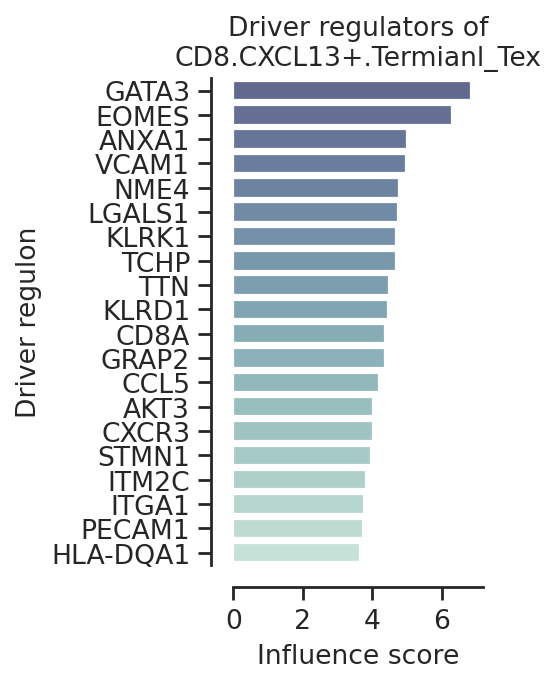

In [51]:
result = CEFCON_obj.cefcon_results_dict['CD8.CXCL13+.Termianl_Tex']

import matplotlib.pyplot as plt
import seaborn as sns
data_for_plot = result.driver_regulator[result.driver_regulator['is_driver_regulator']]
Gene_list_one = set(result.driver_regulator[result.driver_regulator['is_driver_regulator']].index.tolist())
Gene_list_two = set(adata.uns['Subcelltype_ID_type_wilcoxon']['names']['CD8.CXCL13+.Termianl_Tex'][0:500].tolist())
data_for_plot = data_for_plot.loc[Gene_list_one&Gene_list_two,:].sort_values(['influence_score'],ascending=False)
data_for_plot = data_for_plot[0:20]

plt.figure(figsize=(2, len(data_for_plot.index) * 0.2))
sns.set_theme(style='ticks', font_scale=0.5)

ax = sns.barplot(x='influence_score', y=data_for_plot.index, data=data_for_plot, orient='h',
                 palette=sns.color_palette(f"ch:start=.5,rot=-.5,reverse=1,dark=0.4", n_colors=20))
ax.set_title(result.name)
ax.set_xlabel('Influence score')
ax.set_ylabel('Driver regulators')

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('Driver regulators of\nCD8.CXCL13+.Termianl_Tex',fontsize=12)
plt.xlabel('Influence score',fontsize=12)
plt.ylabel('Driver regulon',fontsize=12)
plt.savefig('Gastric/Figure_new/sFigure13/sFigure13_A.png', dpi=300,bbox_inches = 'tight')
sns.despine()

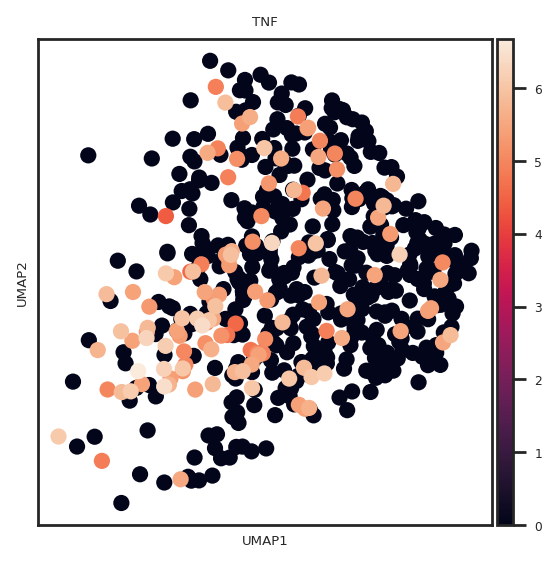

In [20]:
sc.pl.umap(adata[adata.obs['Subcelltype']=='CD8.MAIT'],color=['TNF'])

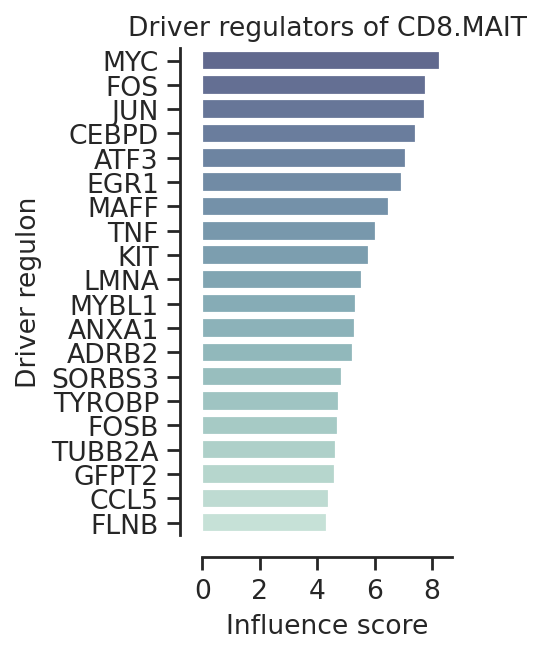

In [21]:

result = CEFCON_obj.cefcon_results_dict['CD8.MAIT']

import matplotlib.pyplot as plt
import seaborn as sns
data_for_plot = result.driver_regulator[result.driver_regulator['is_driver_regulator']]
Gene_list_one = set(result.driver_regulator[result.driver_regulator['is_driver_regulator']].index.tolist())
Gene_list_two = set(adata.uns['Subcelltype_ID_type_wilcoxon']['names']['CD8.MAIT'][0:500].tolist())
data_for_plot = data_for_plot.loc[Gene_list_one&Gene_list_two,:].sort_values(['influence_score'],ascending=False)
data_for_plot = data_for_plot[0:20]

plt.figure(figsize=(2, len(data_for_plot.index) * 0.2))
sns.set_theme(style='ticks', font_scale=0.5)

ax = sns.barplot(x='influence_score', y=data_for_plot.index, data=data_for_plot, orient='h',
                 palette=sns.color_palette(f"ch:start=.5,rot=-.5,reverse=1,dark=0.4", n_colors=20))
ax.set_title(result.name)
ax.set_xlabel('Influence score')
ax.set_ylabel('Driver regulators')

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('Driver regulators of CD8.MAIT',fontsize=12)
plt.xlabel('Influence score',fontsize=12)
plt.ylabel('Driver regulon',fontsize=12)
plt.savefig('Gastric/Figure_new/sFigure13/sFigure13_A_2.png', dpi=300,bbox_inches = 'tight')
sns.despine()

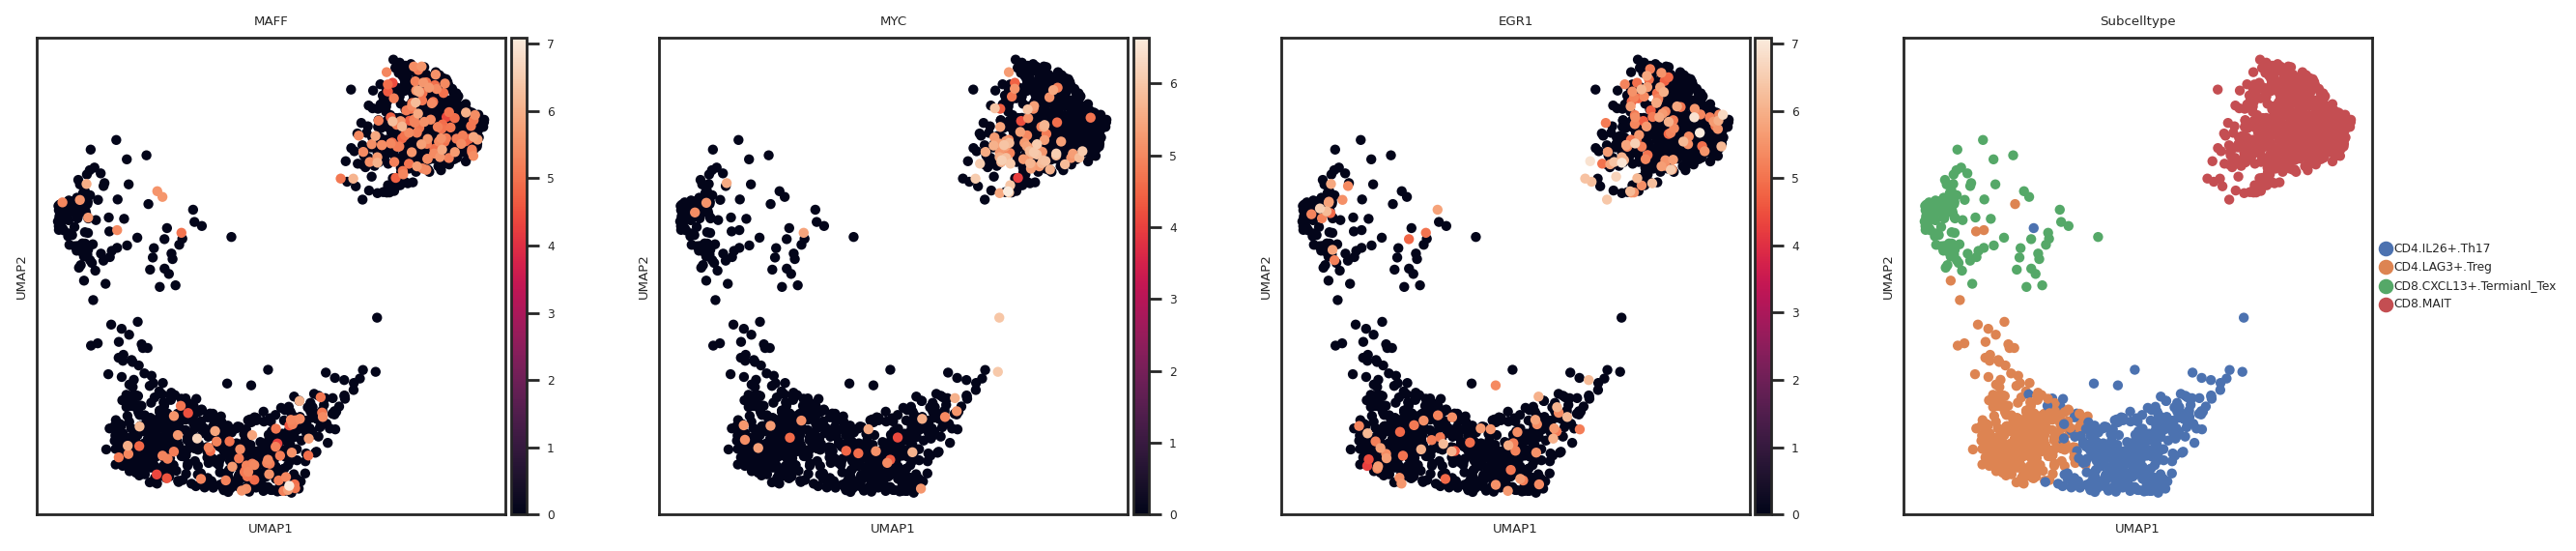

In [22]:
sc.pl.umap(adata,color=['MAFF','MYC','EGR1','Subcelltype'])

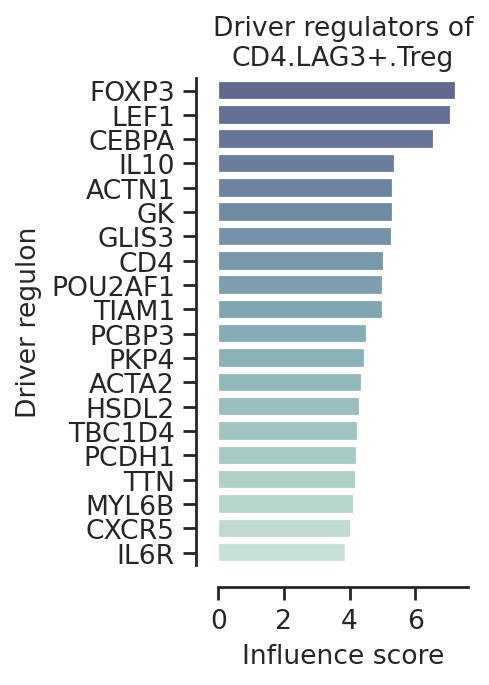

In [23]:

result = CEFCON_obj.cefcon_results_dict['CD4.LAG3+.Treg']

import matplotlib.pyplot as plt
import seaborn as sns
data_for_plot = result.driver_regulator[result.driver_regulator['is_driver_regulator']]
Gene_list_one = set(result.driver_regulator[result.driver_regulator['is_driver_regulator']].index.tolist())
Gene_list_two = set(adata.uns['Subcelltype_ID_type_wilcoxon']['names']['CD4.LAG3+.Treg'][0:500].tolist())
data_for_plot = data_for_plot.loc[Gene_list_one&Gene_list_two,:].sort_values(['influence_score'],ascending=False)
data_for_plot = data_for_plot[0:20]

plt.figure(figsize=(2, len(data_for_plot.index) * 0.2))
sns.set_theme(style='ticks', font_scale=0.5)

ax = sns.barplot(x='influence_score', y=data_for_plot.index, data=data_for_plot, orient='h',
                 palette=sns.color_palette(f"ch:start=.5,rot=-.5,reverse=1,dark=0.4", n_colors=20))
ax.set_title(result.name)
ax.set_xlabel('Influence score')
ax.set_ylabel('Driver regulators')

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('Driver regulators of\nCD4.LAG3+.Treg',fontsize=12)
plt.xlabel('Influence score',fontsize=12)
plt.ylabel('Driver regulon',fontsize=12)
plt.savefig('Gastric/Figure/sFigure13/sFigure13_A_3.png', dpi=300,bbox_inches = 'tight')
sns.despine()

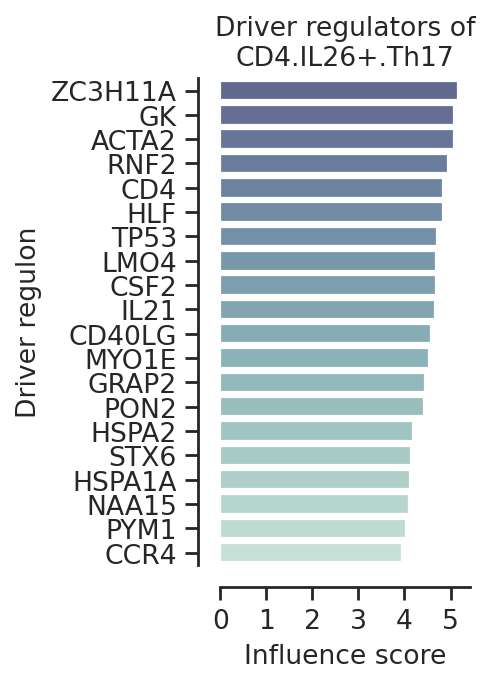

In [24]:

result = CEFCON_obj.cefcon_results_dict['CD4.IL26+.Th17']

import matplotlib.pyplot as plt
import seaborn as sns
data_for_plot = result.driver_regulator[result.driver_regulator['is_driver_regulator']]
Gene_list_one = set(result.driver_regulator[result.driver_regulator['is_driver_regulator']].index.tolist())
Gene_list_two = set(adata.uns['Subcelltype_ID_type_wilcoxon']['names']['CD4.IL26+.Th17'][0:500].tolist())
data_for_plot = data_for_plot.loc[Gene_list_one&Gene_list_two,:].sort_values(['influence_score'],ascending=False)
data_for_plot = data_for_plot[0:20]

plt.figure(figsize=(2, len(data_for_plot.index) * 0.2))
sns.set_theme(style='ticks', font_scale=0.5)

ax = sns.barplot(x='influence_score', y=data_for_plot.index, data=data_for_plot, orient='h',
                 palette=sns.color_palette(f"ch:start=.5,rot=-.5,reverse=1,dark=0.4", n_colors=20))
ax.set_title(result.name)
ax.set_xlabel('Influence score')
ax.set_ylabel('Driver regulators')

ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.title('Driver regulators\nof CD4.IL26+.Th17',fontsize=12)
plt.xlabel('Influence score',fontsize=12)
plt.ylabel('Driver regulon',fontsize=12)
plt.savefig('Gastric/Figure_new/sFigure13/sFigure13_A_4.png', dpi=300,bbox_inches = 'tight')
sns.despine()

In [25]:
set(CEFCON_obj.cefcon_results_dict)

{'CD4.IL26+.Th17', 'CD4.LAG3+.Treg', 'CD8.CXCL13+.Termianl_Tex', 'CD8.MAIT'}

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

def plot_RGM_activity_heatmap(result=None, cell_label=None,
                                   type: str = 'out', col_cluster=True,
                                   figsize=(4, 8),  
                                   bbox_to_anchor=(1.35, 0.90)):
    """
    Plot clustermap of RGM activity matrix.
    If `cell_label` is provided, cells are ordered by cell clusters, else cells are ordered by hierarchical clustering.
    """
    if result.RGMs_AUCell_dict is None:
        raise ValueError(
            f'Did not find the result of RGMs. Run `cefcon.NetModel.RGM_activity` first.'
        )
    assert type in ['out', 'in', 'all']

    if type == 'all':
        auc_mtx = result.RGMs_AUCell_dict['aucell']
    elif type == 'out':
        auc_mtx = result.RGMs_AUCell_dict['aucell_out']
    else:  # in
        auc_mtx = result.RGMs_AUCell_dict['aucell_in']

    # Create a categorical palette to identify the networks
    if cell_label is not None:
        network_lable = cell_label
        network_pal = sns.husl_palette(len(network_lable.unique()), h=.5)
        network_lut = dict(zip(map(str, network_lable.unique()), network_pal))
        network_colors = pd.Series(list(network_lable), index=auc_mtx.index).map(network_lut)
        col_cluster = col_cluster
    else:
        network_colors = None
        col_cluster = col_cluster

    # plot clustermap (n_cell * n_gene)
    with plt.rc_context({'axes.linewidth': 0.5}): 
        g = sns.clustermap(auc_mtx.T, method='ward', square=False, linecolor='black',
                           z_score=0, vmin=-2.5, vmax=2.5,
                           col_cluster=col_cluster, col_colors=network_colors, cmap="RdBu_r",
                           xticklabels=False, yticklabels=True, dendrogram_ratio=0.12,
                           cbar_pos=(0.75, 0.92, 0.2, 0.02),figsize=figsize,
                           cbar_kws={'orientation': 'horizontal'})
        g.cax.set_visible(True)
        g.ax_heatmap.set_ylabel('Regulon-like gene modules')
        g.ax_heatmap.set_xlabel('Cells')
        g.ax_heatmap.yaxis.set_minor_locator(ticker.NullLocator())
        if cell_label is not None:
            for label in network_lable.unique():
                g.ax_col_dendrogram.bar(0, 0, color=network_lut[label], label=label, linewidth=0)
            g.ax_col_dendrogram.legend(title='Cell types', loc="upper left", ncol=1,
                                       bbox_to_anchor=bbox_to_anchor, facecolor='white')
        g.ax_row_dendrogram.set_visible(False)
        return g
    # plt.show()

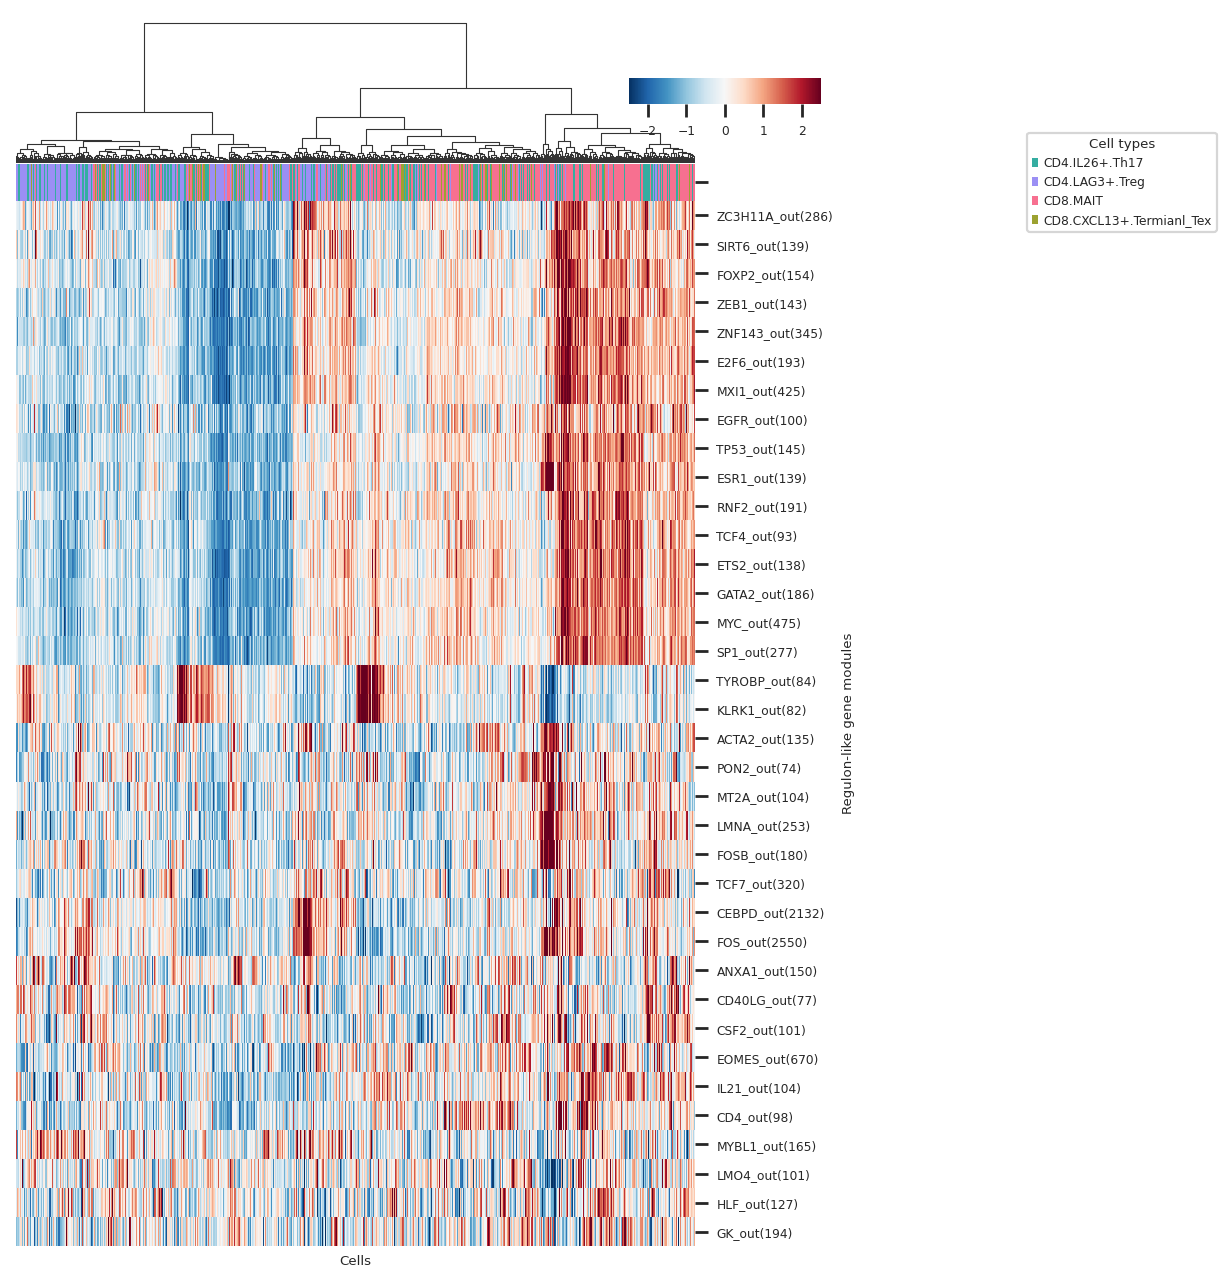

In [50]:
adata_lineage = adata[adata.obs_names[adata.obs[result.name].notna()],:]

g = plot_RGM_activity_heatmap(result=result, cell_label=adata_lineage.obs['Subcelltype'],figsize=(6, 8),
                                 type='out',col_cluster=True,bbox_to_anchor=(1.48, 0.25))
plt.savefig('Gastric/Figure_new/sFigure13/sFigure13_B.png', dpi=300,bbox_inches = 'tight')


In [41]:
adata_lineage.obs['Subcelltype'].unique()

['CD4.IL26+.Th17', 'CD4.LAG3+.Treg', 'CD8.MAIT', 'CD8.CXCL13+.Termianl_Tex']
Categories (4, object): ['CD4.IL26+.Th17', 'CD4.LAG3+.Treg', 'CD8.CXCL13+.Termianl_Tex', 'CD8.MAIT']